<a href="https://colab.research.google.com/github/adhib-haassan/CodSoft-Data-Science/blob/main/TASK_5%20-%20CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#INFO ABOUT DATASET

In [17]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [19]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [20]:
df.duplicated().sum()

32

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

#CALCULATING LEGIT AND FAKE TRANSACTIONS

In [23]:
df['Class'].value_counts()

Class
0.0    3938
1.0       2
Name: count, dtype: int64

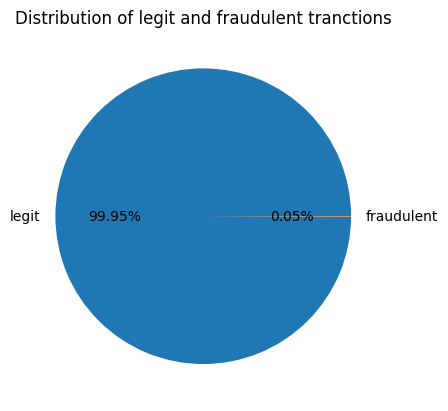

In [24]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

#SEPERATING DATA

In [25]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [26]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3610,0.816969,-0.280175,1.354064,2.859548,-0.792255,0.723782,-0.662957,0.298866,1.372479,...,-0.133302,-0.433181,-0.111095,-0.108651,0.181549,-0.089374,-0.026460,0.038635,150.91,0.0
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0


In [27]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1.0


In [28]:
legit.Amount.describe()

count    3938.000000
mean       65.237298
std       214.419192
min         0.000000
25%         2.242500
50%        12.990000
75%        55.225000
max      7712.430000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

#COMPARING BOTH TRANSACTIONS

In [30]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.904774,-0.325738,0.304664,0.836951,0.005768,-0.028697,0.048759,0.149434,-0.076162,0.053419,...,0.059987,0.011201,-0.081510,-0.058679,0.032856,0.095155,-0.012263,0.046331,0.003130,65.237298
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


#UNDERSAMPLING

In [31]:
legit_sample = legit.sample(n=473)

#CONCATENATING DATASETS

In [32]:
new_df = pd.concat([legit_sample,fraud],axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2333,1873,1.217878,0.042058,-0.320100,0.885085,0.707488,1.130205,-0.079391,0.260373,0.204239,...,-0.160053,-0.299592,-0.295263,-1.699282,0.846445,-0.223232,0.028881,-0.010170,21.57,0.0
1164,909,1.187159,-0.934721,-1.379231,-2.272409,1.501795,3.182007,-0.669757,0.786223,1.622727,...,-0.093182,-0.267485,-0.228083,1.083156,0.811431,0.064359,0.004318,0.018598,89.46,0.0
916,692,1.236646,0.306499,0.190288,0.497587,-0.136113,-0.553196,-0.011583,-0.045015,-0.229983,...,-0.255791,-0.765166,0.073434,-0.037838,0.236204,0.097069,-0.026258,0.017657,1.98,0.0
806,611,-0.968414,0.210690,2.687166,1.198654,-0.105466,-0.479647,-0.334049,0.208853,-0.183811,...,0.212307,0.419830,-0.128308,0.378840,0.149002,-0.192992,0.101799,0.109335,19.98,0.0
1469,1146,1.168567,-0.936605,1.256708,0.756896,-1.104698,1.509542,-1.343113,0.425855,0.234022,...,-0.483165,-0.494513,-0.193225,-0.816779,0.582818,-0.229660,0.123055,0.029609,50.00,0.0


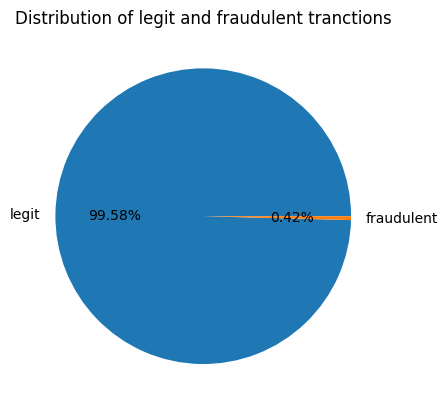

In [33]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [34]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.904774,-0.325738,0.304664,0.836951,0.005768,-0.028697,0.048759,0.149434,-0.076162,0.053419,...,0.059987,0.011201,-0.081510,-0.058679,0.032856,0.095155,-0.012263,0.046331,0.003130,65.237298
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


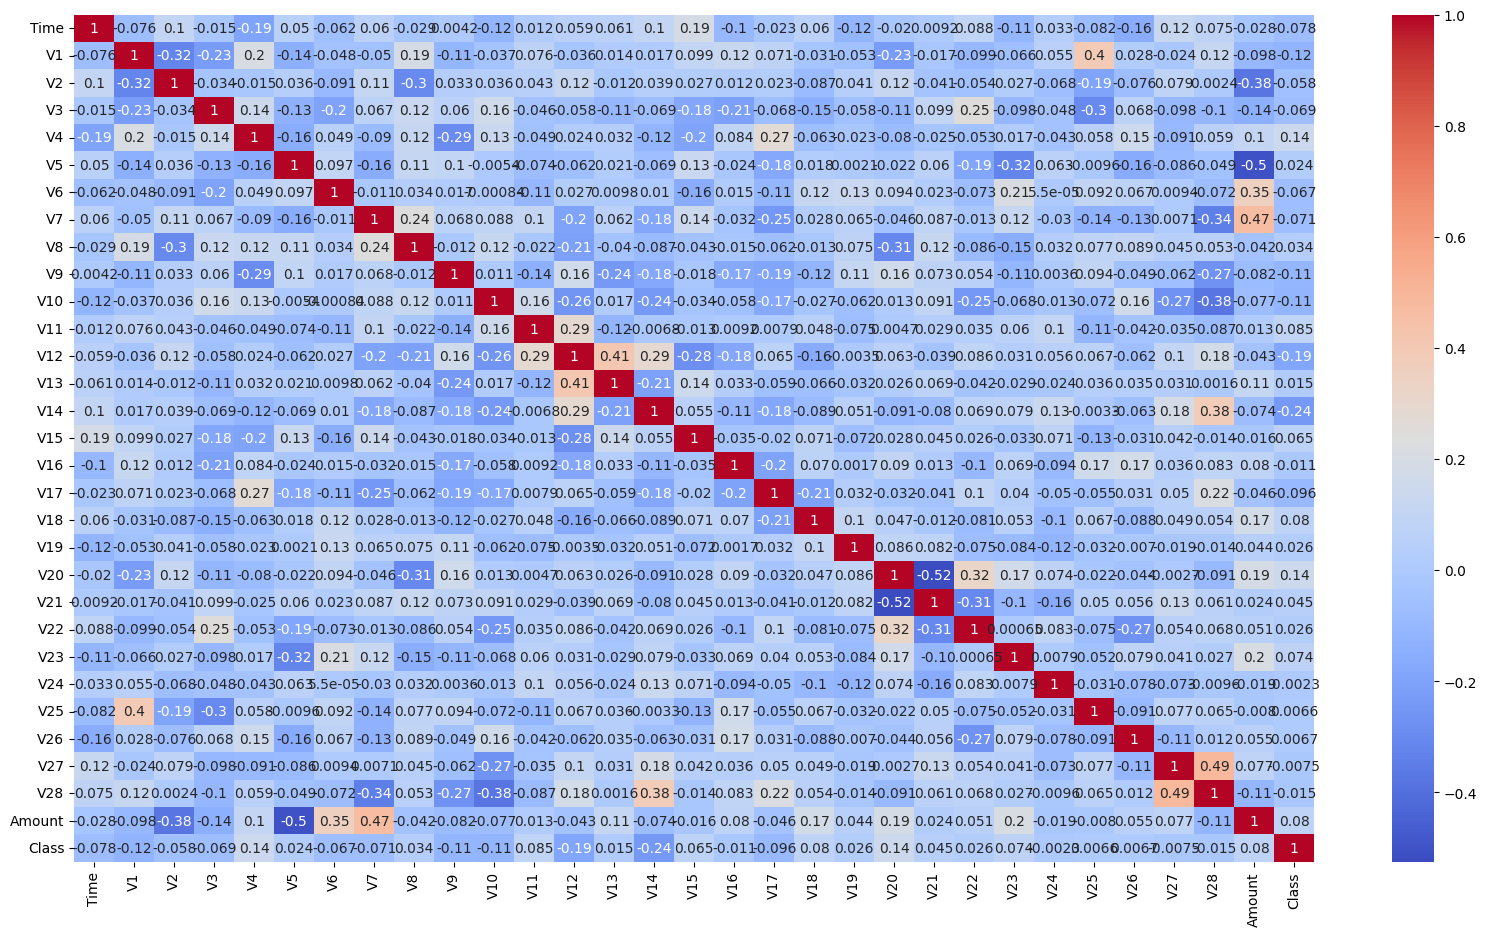

In [35]:
plt.figure(figsize=(20,11))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

#SPLITTING DATA INTO FEATURES AND TARGET

In [36]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2333,1873,1.217878,0.042058,-0.320100,0.885085,0.707488,1.130205,-0.079391,0.260373,0.204239,...,-0.120052,-0.160053,-0.299592,-0.295263,-1.699282,0.846445,-0.223232,0.028881,-0.010170,21.57
1164,909,1.187159,-0.934721,-1.379231,-2.272409,1.501795,3.182007,-0.669757,0.786223,1.622727,...,0.188128,-0.093182,-0.267485,-0.228083,1.083156,0.811431,0.064359,0.004318,0.018598,89.46
916,692,1.236646,0.306499,0.190288,0.497587,-0.136113,-0.553196,-0.011583,-0.045015,-0.229983,...,-0.047607,-0.255791,-0.765166,0.073434,-0.037838,0.236204,0.097069,-0.026258,0.017657,1.98
806,611,-0.968414,0.210690,2.687166,1.198654,-0.105466,-0.479647,-0.334049,0.208853,-0.183811,...,0.259943,0.212307,0.419830,-0.128308,0.378840,0.149002,-0.192992,0.101799,0.109335,19.98
1469,1146,1.168567,-0.936605,1.256708,0.756896,-1.104698,1.509542,-1.343113,0.425855,0.234022,...,-0.378531,-0.483165,-0.494513,-0.193225,-0.816779,0.582818,-0.229660,0.123055,0.029609,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,536,1.114270,-1.084926,0.873099,-0.716837,-1.405362,0.085765,-1.125740,0.231227,-0.584220,...,0.216548,0.508500,1.188515,-0.157749,0.062636,0.272105,-0.044968,0.029386,0.026769,102.00
265,188,1.168433,0.319978,0.589693,1.044774,-0.376942,-0.677335,0.054472,-0.087670,-0.304110,...,-0.091523,0.020051,0.066970,-0.017274,0.532429,0.502070,-0.470804,0.021893,0.019337,8.09
1369,1064,-0.457111,0.580062,2.167524,-0.685630,-1.149030,0.061500,-1.481212,-2.563183,-0.032810,...,0.695470,-1.088454,0.848251,-0.233581,0.493454,1.069105,1.129483,-0.049186,0.172376,16.90
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00


In [37]:
y

2333    0.0
1164    0.0
916     0.0
806     0.0
1469    0.0
       ... 
712     0.0
265     0.0
1369    0.0
541     1.0
623     1.0
Name: Class, Length: 475, dtype: float64

#SPLITTING DATA TO TEST AND TRAIN

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

#MODEL TRAINING

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [40]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
LogisticRegression()

LogisticRegression()

#MODEL EVALUATION

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 100.0 %


In [44]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 97.89473684210527 %


<ipython-input-45-b1e9e7084151>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')


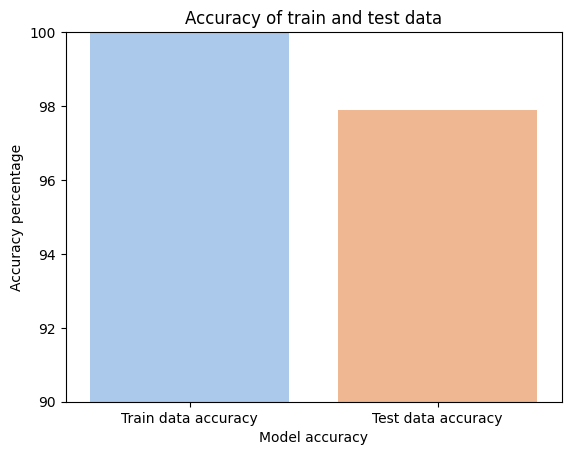

In [45]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(90,100)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

In [46]:
print(confusion_matrix(y_test,y_test_pred))

[[93  2]
 [ 0  0]]


#CLASSIFICATION REPORT

In [47]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        95
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98        95
   macro avg       0.50      0.49      0.49        95
weighted avg       1.00      0.98      0.99        95



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
